<font size="10">**Homework 11**<font>

Using Python in a Jupyter notebook, simulate the time evolution of a Gaussian wave packet in a harmonic oscillator potential.  Find a starting condition that gives a result that looks similar to what is expected classically.

**Time Evolution**
$\psi(x,t)=\sum_n A_n \psi_n(x)\exp(-i \omega_n t)$

**Wave Function** $\psi_n(x)=\sqrt{\frac{2}{L}}\sin(\frac{n \pi x}{L})$

**Gaussian Shape**

$y(x)=\sum_n A_n \psi_n(x)$

$A_n=\int_0^L y(x)\psi_n(x)\mathrm{d}x$

**Probability Distribution** $\psi(x,t)^*\psi(x,t)$

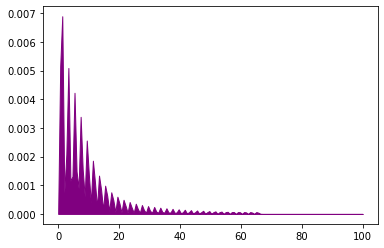

In [41]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot
import matplotlib.animation

# Set Initial Condition to match Classical Behaviour
L = 100; hbar = 1; m = 1; num = 50

#coefficients for complex wave equation of Quantum Oscillator
C = np.zeros(num,dtype = np.complex_);
pie = np.pi

# Make X Vector
x = np.linspace(0,L,150);

# Make Y Vector
psi2 = np.zeros(150);

# Wave Function of Quantum Harmonic Oscillator (With Complex Parts)
def psi0(x):
    if(x<=L and x>=0):
        return 0.4*np.exp(-((x-5)**2)/20)*np.exp(complex(0,2*x));
    else:
        return 0;
    
# Parts of Wave Equation not dependant on time
def psi_n(x,n):
    if(x>=0 and x<=L):
        return np.sqrt(2/L)*np.sin(n*pie*x/L);
    else:
        return 0;

#calculate co-efficients using fourier's trick
for i in range(num):
    n = i+1;
    I_Real = lambda x: psi_n(x,n)*np.real(psi0(x));
    I_Imag = lambda x: psi_n(x,n)*np.imag(psi0(x));
    C[i] = complex(integrate.quad(I_Real,0,L)[0],integrate.quad(I_Imag,0,L)[0]);
    
# Wave Function  
def psi(x,t):
    val = 0
    for i in range(num):
        n = i+1;
        val+=C[i]*psi_n(x,n)*np.exp(complex(0,-(n**2)*(pie**2)*hbar*t/(2*m*(L**2))))
    return val;

# Create Figure for Animation
fig1 = pyplot.figure()

# Probability
def plot_probability(frame_number):
    t = frame_number/150;
    for i in range(100):
        psi2[i] = abs(psi(x[i],t))**2; #probability density
    p = pyplot.fill_between(x, psi2,color='purple');
    return p,
        
ani = matplotlib.animation.FuncAnimation(fig, plot_probability,frames=10, interval=10, blit=True)


**For Some Reason the Animation is not working.**